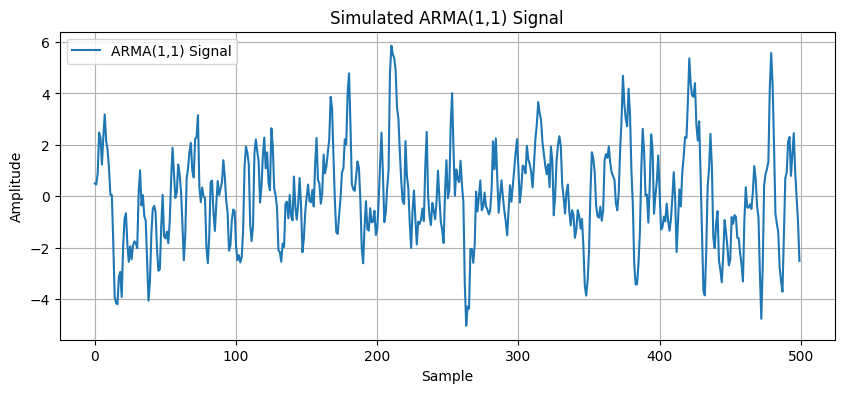


Model AR(2)
AIC: 1425.90
Residual variance: 0.9954

Model MA(2)
AIC: 1483.85
Residual variance: 1.1180

Model ARMA(1,1)
AIC: 1407.89
Residual variance: 0.9601


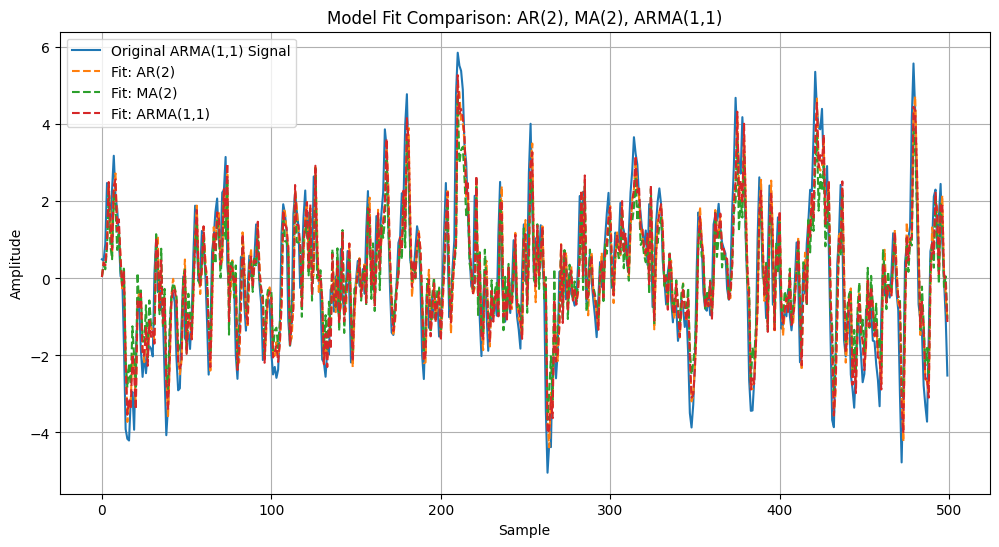

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

# Set random seed and sample size
np.random.seed(42)
N = 500
w = np.random.normal(0, 1, N)

# 1. Simulate ARMA(1,1) signal
# x[n] = -a1 * x[n-1] + b0 * w[n] + b1 * w[n-1]
a = [1, -0.7]  # AR coefficients
b = [1.0, 0.5] # MA coefficients

arma_signal = lfilter(b, a, w)

# Plot the original ARMA(1,1) signal
plt.figure(figsize=(10, 4))
plt.plot(arma_signal, label='ARMA(1,1) Signal')
plt.title('Simulated ARMA(1,1) Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# 2. Fit AR(2), MA(2), and ARMA(1,1) models
models = {
    "AR(2)": ARIMA(arma_signal, order=(2, 0, 0)),
    "MA(2)": ARIMA(arma_signal, order=(0, 0, 2)),
    "ARMA(1,1)": ARIMA(arma_signal, order=(1, 0, 1))
}

results = {}
for name, model in models.items():
    fit = model.fit()
    results[name] = {
        "model": fit,
        "aic": fit.aic,
        "resid_var": np.var(fit.resid)
    }
    print(f"\nModel {name}")
    print(f"AIC: {fit.aic:.2f}")
    print(f"Residual variance: {np.var(fit.resid):.4f}")

# 3. Plot model fits vs original signal
plt.figure(figsize=(12, 6))
plt.plot(arma_signal, label='Original ARMA(1,1) Signal', linewidth=1.5)

for name, result in results.items():
    pred = result["model"].predict()
    plt.plot(pred, label=f'Fit: {name}', linestyle='--')

plt.title("Model Fit Comparison: AR(2), MA(2), ARMA(1,1)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()
